In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("drive/MyDrive/pizza_v2.csv")
df.head(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
5,A,"Rp140,000",18.5 inch,black_papper,american_favorite,jumbo,no,no,yes
6,A,"Rp110,000",16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes
7,A,"Rp70,000",8 inch,papperoni,american_favorite,reguler,no,no,yes
8,A,"Rp90,000",12 inch,mushrooms,american_favorite,reguler,yes,no,yes
9,A,"Rp90,000",12 inch,smoked_beef,american_favorite,reguler,no,no,no


In [ ]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [ ]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [ ]:
# Renaming price column
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)

# Extracting digits in price column and converting to integer
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)

# Extracting digits in diameter and converting to integer
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float)

In [ ]:
df.head(10)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes
5,A,140000,18.5,black_papper,american_favorite,jumbo,no,no,yes
6,A,110000,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
7,A,70000,8.0,papperoni,american_favorite,reguler,no,no,yes
8,A,90000,12.0,mushrooms,american_favorite,reguler,yes,no,yes
9,A,90000,12.0,smoked_beef,american_favorite,reguler,no,no,no


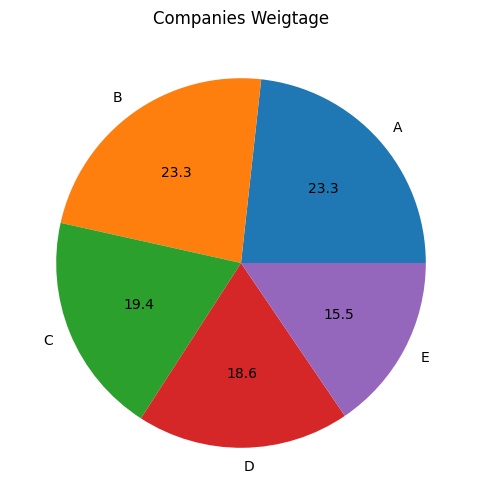

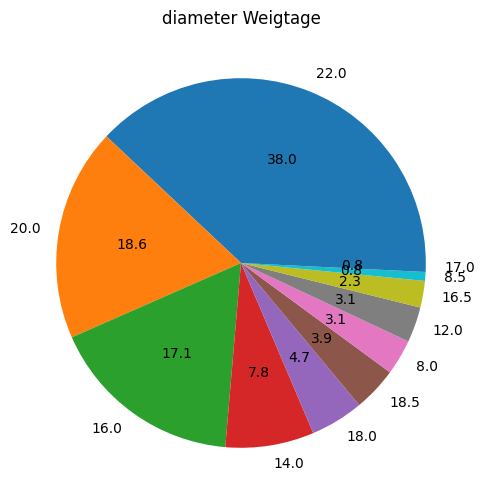

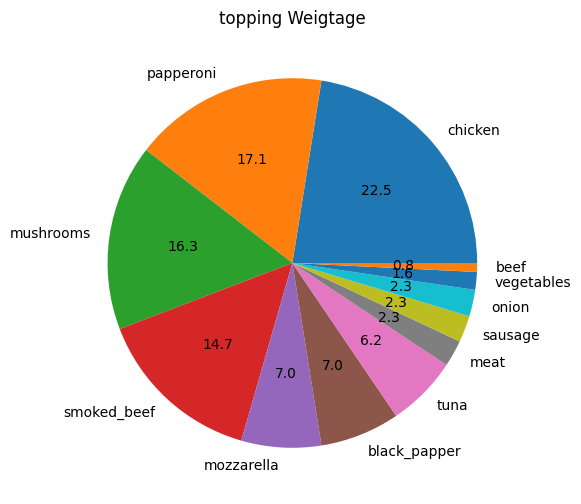

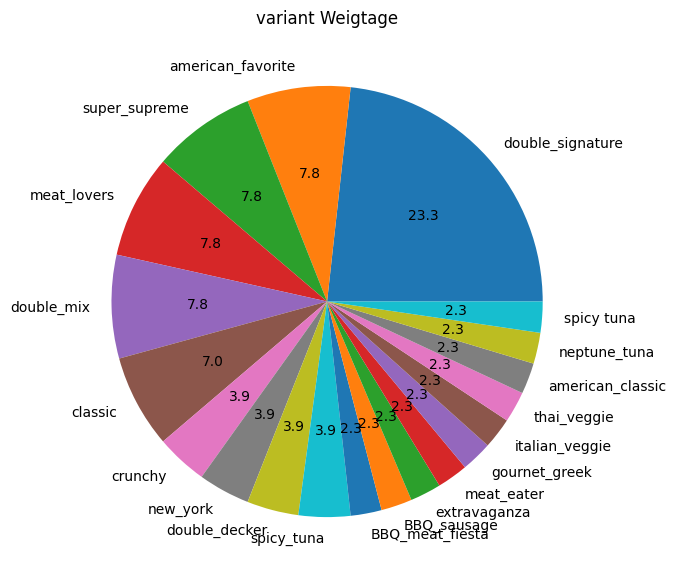

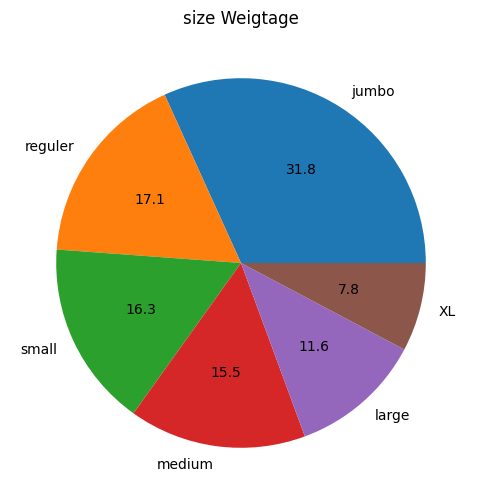

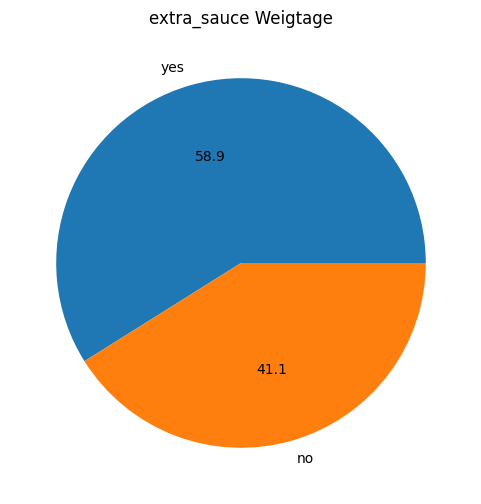

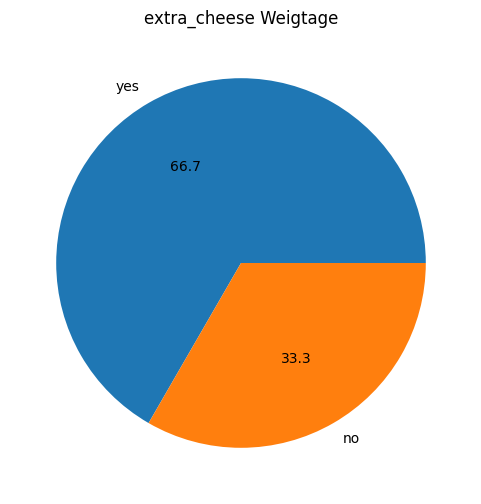

In [ ]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping Weigtage')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese Weigtage')
plt.show()

<Axes: xlabel='company', ylabel='Count'>

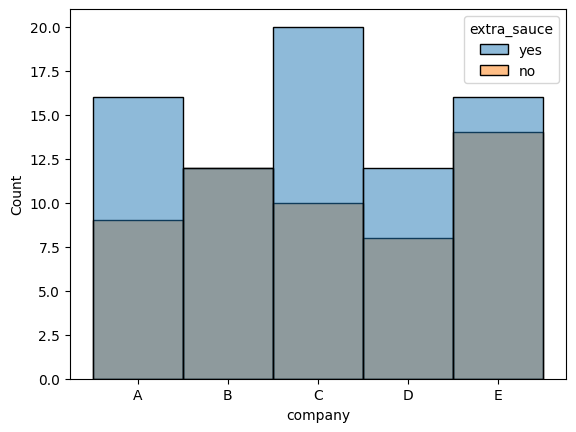

In [ ]:
sns.histplot(data=df, x="company",hue='extra_sauce')

<ipython-input-11-9baea84fbc48>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['company'].value_counts(), color='g', shade=True)


<Axes: xlabel='company', ylabel='Density'>

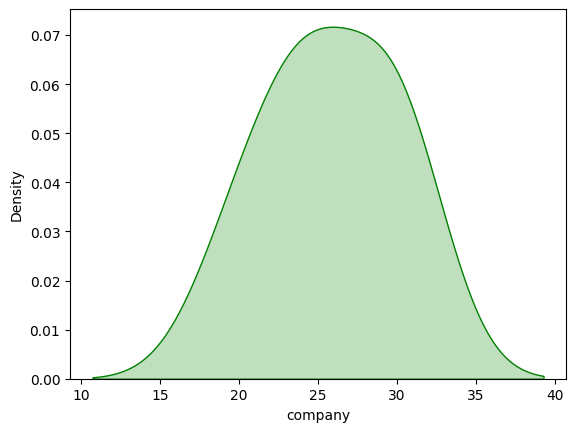

In [ ]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

<ipython-input-12-12c2c7b7e584>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)


<Axes: xlabel='topping', ylabel='Density'>

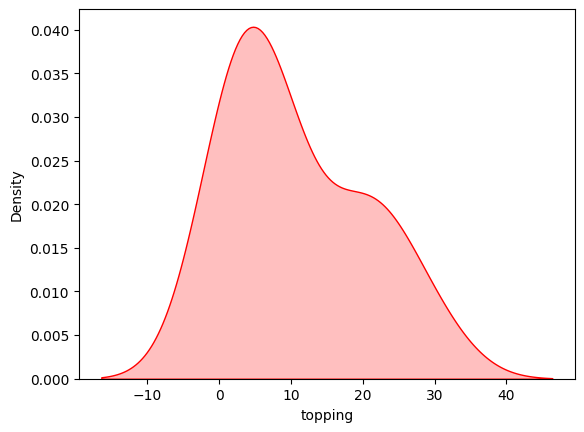

In [ ]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

<Axes: xlabel='company', ylabel='Count'>

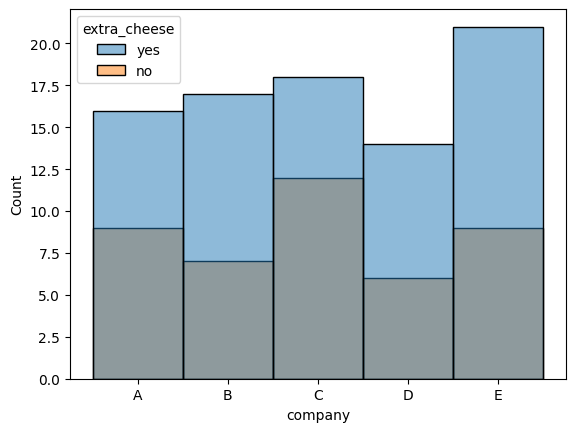

In [ ]:
sns.histplot(data=df, x="company",hue='extra_cheese')

<Axes: xlabel='company', ylabel='Count'>

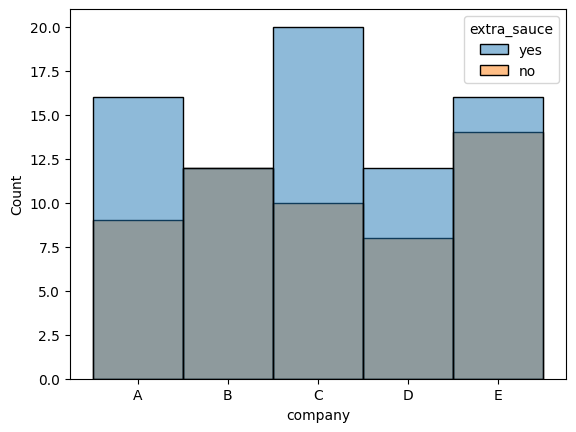

In [ ]:
sns.histplot(data=df, x="company",hue='extra_sauce')

<Axes: xlabel='price', ylabel='Count'>

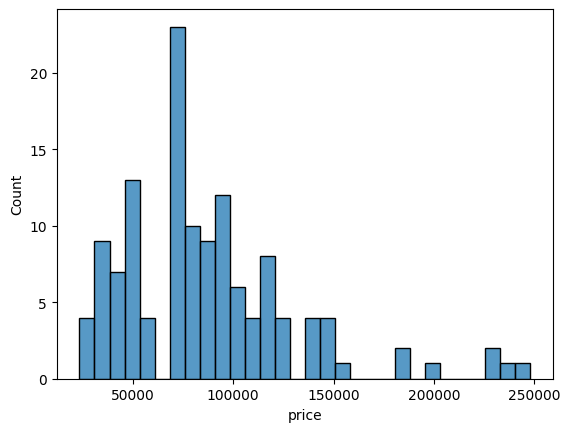

In [ ]:
sns.histplot(data=df, x='price',bins=30)

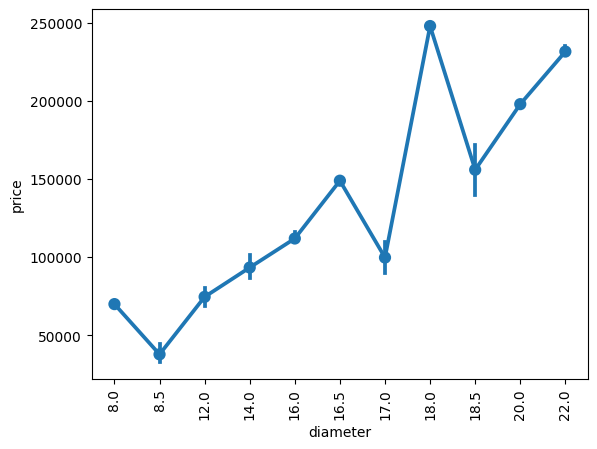

In [ ]:
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

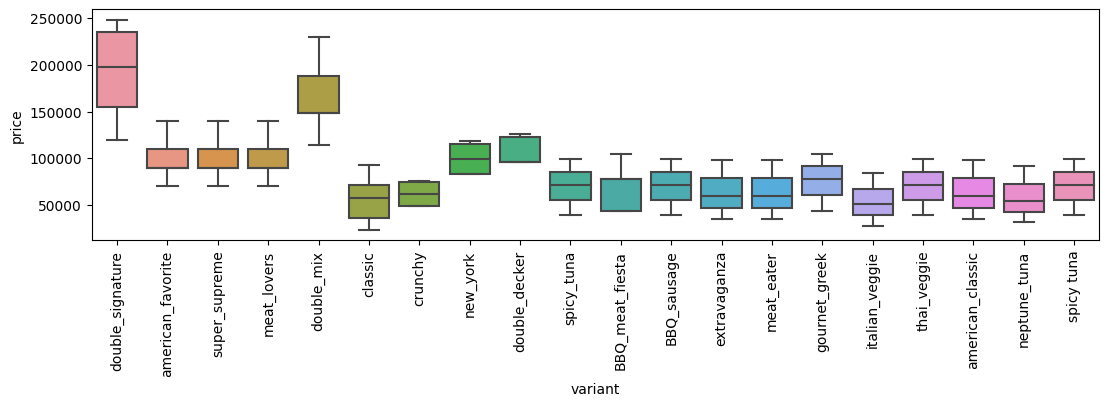

In [ ]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

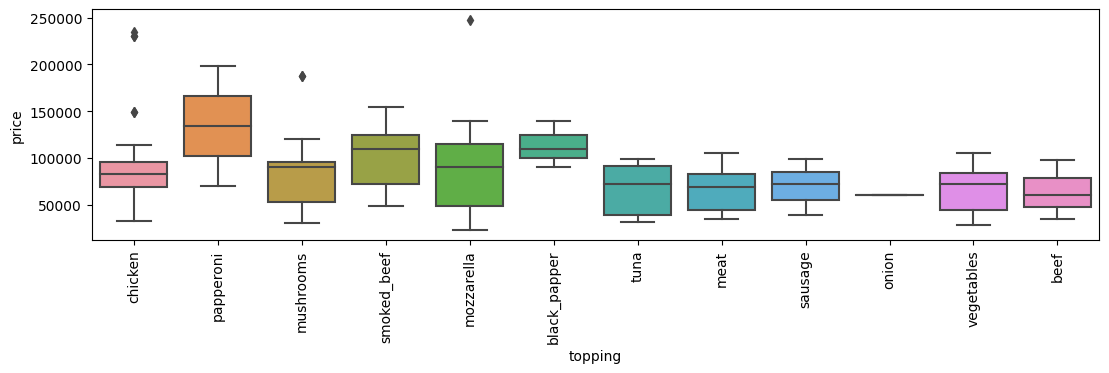

In [ ]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pip install --upgrade category_encoders

  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Attempting uninstall: category_encoders
    Found existing installation: category-encoders 2.5.1.post0
    Uninstalling category-encoders-2.5.1.post0:
      Successfully uninstalled category-encoders-2.5.1.post0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evalml 0.78.0 requires category-encoders<=2.5.1.post0,>=2.2.2, but you have category-encoders 2.6.1 which is incompatible.


In [ ]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final
def one_hot(df, column):
    df = one_hot_encoding(df,column)
    return df

In [ ]:
df = one_hot(df, 'company')
df = one_hot(df, 'topping')
df = one_hot(df, 'variant')
df = one_hot(df, 'size')
df = one_hot(df, 'extra_sauce')
df = one_hot(df, 'extra_cheese')

In [ ]:
df = one_hot(df, 'extra_mushrooms')

In [ ]:
df.head(10)

,company_A,company_B,company_C,company_D,company_E,price,diameter,topping_chicken,topping_papperoni,topping_mushrooms,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
0,1,0,0,0,0,235000,22.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,198000,20.0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,120000,16.0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,155000,14.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,0,0,0,0,248000,18.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,1,0,0,0,0,140000,18.5,0,0,0,...,0,0,0,0,0,1,0,1,0,1
6,1,0,0,0,0,110000,16.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7,1,0,0,0,0,70000,8.0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
8,1,0,0,0,0,90000,12.0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
9,1,0,0,0,0,90000,12.0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
df.dtypes

company_A                      int64
company_B                      int64
company_C                      int64
company_D                      int64
company_E                      int64
price                          int64
diameter                     float64
topping_chicken                int64
topping_papperoni              int64
topping_mushrooms              int64
topping_smoked_beef            int64
topping_mozzarella             int64
topping_black_papper           int64
topping_tuna                   int64
topping_meat                   int64
topping_sausage                int64
topping_onion                  int64
topping_vegetables             int64
topping_beef                   int64
variant_double_signature       int64
variant_american_favorite      int64
variant_super_supreme          int64
variant_meat_lovers            int64
variant_double_mix             int64
variant_classic                int64
variant_crunchy                int64
variant_new_york               int64
v

In [ ]:
x = df.drop("price",axis = 1)
y = df["price"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

### We will be using the following models:
- XGB Regressor
- Support Vector Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {'n_estimators':[2000,4000,6000],
             'max_depth':[3,4,5,6],
             'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [ ]:
final = GridSearchCV(XGBRegressor(random_state=42),
                                    param_grid=param_grid,
                                    scoring='r2')

In [ ]:
X_train.head()

,company_A,company_B,company_C,company_D,company_E,diameter,topping_chicken,topping_papperoni,topping_mushrooms,topping_smoked_beef,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
44,0,1,0,0,0,12.0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
116,0,0,0,0,1,17.0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,0
74,0,0,1,0,0,12.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
60,0,0,1,0,0,14.0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
61,0,0,1,0,0,8.5,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


In [ ]:
final.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [2000, 4000, 6000]},
             scoring='r2')

In [ ]:
final.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 4000}

In [ ]:
Best_param= {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 2000}

In [ ]:
xgb= XGBRegressor(learning_rate= 0.2,max_depth= 6, n_estimators= 2000)

In [ ]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred= xgb.predict(X_test)

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(pred, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 10910.39253
RMSE: 18829.16239
r2 score: 0.63929


In [ ]:
from sklearn.svm import SVR
svr= SVR()

In [ ]:
svr.fit(X_train,Y_train)
pred1= svr.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(pred1, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred1, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred1, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 31652.09348
RMSE: 36927.97521
r2 score: -67051760.65637
